# 計量経済学 重回帰分析

一橋大学大学院経済学研究科 原泰史

ここでは前半に引き続き、日本中の経済学部/経営学部に存在する「計量経済学」という講義の中で最初にドアをノックすることで有名な回帰分析を、Python を通じて学習することを目指します。Google Colaboratory 上で実行出来るようになっていますので、適宜コードを実行して頂ければと思います。

今回は、重回帰分析を行います。

* 回帰係数の推定
* 決定係数の導出
* 回帰係数の検定
* Statsmodelsを使った分析

などについて、その概要およびPython での実行方法を履修していただきます。

実行の際には、[ファイル]-[ドライブにコピーを保存]から、Notebook を自らのGoogle アカウントにコピーする作業を行ってください。



## サンプルデータセットの読み込み

まずはサンプルのデータセットを読み込みます。Day2+3と同じものです。

In [ ]:
#ボストンのデータセットを読み込む
from sklearn.datasets import load_boston
boston = load_boston() 

In [ ]:
#データの中身を確認する
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
#Pandas をインポートする
import pandas as pd

#X の値を取り出す
X = pd.DataFrame(boston.data, columns=boston.feature_names)
#Y の値を取り出す
#名前を指定する
y_name={"price"}
Y = pd.DataFrame(boston.target, columns=y_name)

In [ ]:
#Xの中身を確認する
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
#Yの中身を確認する
Y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 重回帰分析

「回帰分析は変数間の因果関係を明らかにするための統計的な手法」であるがゆえに、ひとつの変数とひとつの変数のペアを入力と出力に見立てて関係性を観察するだけは、ちょっと勿体ない気がします。そのため、被説明変数と複数の説明変数との関係を測定する回帰分析の手法である、重回帰分析をご紹介します。

たとえば、ある値X_1とX_2とYが存在するとします。この３つの変数の関係を、以下のような式で示す。ここでのiは、それぞれの分析単位ごとの値を示しています。たとえば、国や企業や学生など、特定の集合の中から抽出された群の値の束が, iからnまで存在していることを考えます。

$$ Y_i + \alpha_i + \beta_1 X_1 + \beta_2 X_2 + u_i   
, i =1,2,..., n$$

こうした式を、重回帰モデルと呼びます。単回帰モデルと同じく、最小二乗法 (OLS) を用いてαやβ1やβ2を導出します。

単回帰と同様、X1, X2とYの値を用いて、先程のαおよびβを求めると、以下のような関係が成り立ちます。

$$ \hat{Y} = \hat{\alpha} + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 $$

ここでは、αやβの推定値（係数）を求めていることになります。ところで、YとX1, X2との関係性をひとつの直線で説明しようとすると、単回帰の結果で見てきたように、かならずどこかで「ズレ」が起きることになります。やはりこれを、残差と呼ぶことにしましょう。式で示すと、

$$ \hat{u} = Y - \hat{Y} = Y - (\hat{\alpha} + \hat{\beta}_1 X_1 + + \hat{\beta}_2 X_2) $$

となります。これらを右辺と左辺でそれぞれ自乗しi個分足し合わせる、すなわち総和を求めると、以下の式が与えられます。このとき、残差の二乗の総和を求めるので、残差２乗和もしくは残差平方和と呼びます。

$$ \sum{\hat{u}}^2 = \sum [Y - (\hat{\alpha} + \hat{\beta_1}X_1 + \hat{\beta_2}X_2) ]^2 $$

ここで、残差２乗和が最小になるような値を求めるには、α、β1、β2でそれぞれ偏微分を行います。すなわち、FOC (一階の条件) を求め整理すると、以下の連立方程式が与えられます。

$$ \sum{Y} = n \hat{\alpha} + \hat{\beta_1} \sum{X_1} + \hat{\beta_2} \sum{X_2} $$
$$ \sum{YX_1} = \hat{\alpha}\sum{X_1} + \hat{\beta_1} \sum{X_1}^2 + \hat{\beta_2} \sum X_1 X_2 $$
$$ \sum{YX_2} = \hat{\alpha}\sum{X_2} + \hat{\beta_1} \sum{X_1 X_2} + \hat{\beta_2} \sum{X_2}^2 $$

さて、これらの連立方程式をαとβ1とβ2について解法すれば係数をもとめる式が与えられるのですが、ここでは順繰りに値を求めてみたいと思います。

計算にはサンプルデータセットのうち、Price(Y) とAge（X_1)およびCRIM(X_2)を利用します。
ボストンの不動産価格(Y)が、その建物の年齢(X1)と周辺の犯罪率(X2)によって説明付けられるモデルを解法することになります。

まずは、それぞれの値の特性について確認しましょう。

### 変数同士の関係性を相関係数やグラフで確認する

ここでは、XからAGE(築年数)とCRIM(犯罪率)の値を取り出して、重回帰分析を行ってみます。まずは、相関係数やヒストグラム、散布図などを描いてみます。

In [ ]:
import numpy as np
X_list=pd.concat([X.CRIM, X.AGE], axis=1)

#相関係数を求める
X_list.corr()

,CRIM,AGE
CRIM,1.000000,0.352734
AGE,0.352734,1.000000


Age のヒストグラムを求めると、以下のようになります。

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <a list of 10 Patch objects>)

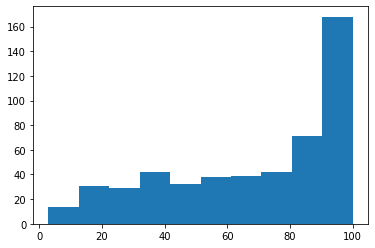

In [ ]:
import matplotlib.pyplot as plt
plt.hist(X_list.AGE)

CRIMをヒストグラムで確認します。

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

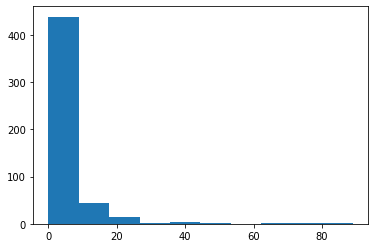

In [ ]:
import matplotlib.pyplot as plt
plt.hist(X_list.CRIM)

散布図は以下のようになります。なんとも関係性にとぼしそうな２変数間であることがわかります。

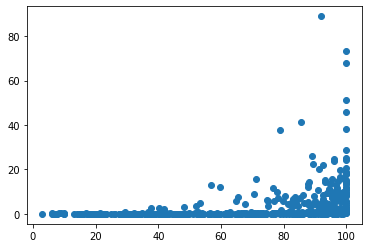

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X.AGE, X.CRIM)

続いて、この2変数とPrice(Y)との関係性を3次元グラフにして描写してみたいと思います。

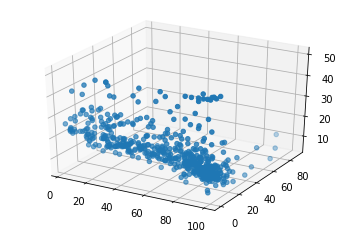

In [ ]:
import matplotlib.pyplot as plt
#三次元用プロットのパッケージをインポートする
from mpl_toolkits.mplot3d import axes3d

#Series型に変換する
Y_data=Y["price"]
y_sum=np.sum(Y_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.AGE, X.CRIM, Y_data)
plt.show()

。。。なんとなくわかった感じになるけれど、やっぱり三次元はわかりにくい！

### 回帰係数の推定

**統計量を求める**

まず、以下の統計量をそれぞれ計算しておきましょう。

*   $\sum{Y}$
*   $\sum{X_1}$
*   $\sum{X_2}$
*   $\sum{Y^2}$
*   $\sum{X_1^2}$
*   $\sum{X_2^2}$
*   $\sum{Y X_1}$
*   $\sum{Y X_2}$
*   $\sum{X_1 X_2}$

In [ ]:
#Series型に変換する
Y_data=Y["price"]
y_sum=np.sum(Y_data)
print("Y_SUM", y_sum)
#X1の和を求める
x1_sum=np.sum(X_list.AGE)
print("X1_SUM", x1_sum)
#X1の和を求める
x2_sum=np.sum(X_list.CRIM)
print("X2_SUM", x2_sum)
#Yの自乗和を求める
y_power=np.sum(np.power(Y_data,2))
print("Y_POWER", y_power)
#X1の自乗和を求める
x1_power=np.sum(np.power(X_list.AGE,2))
print("X1_POWER", x1_power)
#X2の自乗和を求める
x2_power=np.sum(np.power(X_list.CRIM,2))
print("X2_POWER", x2_power)
#Y*X1を求める
Y_X1=np.sum(Y_data*X_list.AGE)
print("Y_X1", Y_X1)
#Y*X2を求める
Y_X2=np.sum(Y_data*X_list.CRIM)
print("Y_X2", Y_X2)
#X1*X2を求める
X1_X2=np.sum(X_list.AGE*X_list.CRIM)
print("X1_X2", X1_X2)

Y_SUM 11401.600000000002
X1_SUM 34698.9
X2_SUM 1828.4429200000004
Y_POWER 299626.33999999997
X1_POWER 2779614.63
X2_POWER 43970.3435551508
Y_X1 732581.1400000001
Y_X2 25687.103669
X1_X2 168514.98033299998


**平方和と積和を求める**

以下のように、変数間の平方和と積和を導出します。

$$ S_{YY} = \sum{(Y-\bar{Y})^2}$$
$$ S_{11} = \sum{(X_1-\bar{X_1})^2}$$
$$ S_{22} = \sum{(X_2-\bar{X_2})^2}$$
$$ S_{Y1} = \sum{(Y-\bar{Y})(X_1-\bar{X_1})}$$
$$ S_{Y2} = \sum{(Y-\bar{Y})(X_2-\bar{X_2})}$$
$$ S_{12} = \sum{(X_1-\bar{X_2})(X_2-\bar{X_2})}$$



In [ ]:
#SYYを求める
SYY=np.sum(np.power(Y_data-np.average(Y_data),2))
print("SYY", SYY)
#S11を求める
S11=np.sum(np.power(X_list.AGE-np.average(X_list.AGE),2))
print("S11", S11)
#S12を求める
S22=np.sum(np.power(X_list.CRIM-np.average(X_list.CRIM),2))
print("S22", S22)

#Yの平均を求める
Y_AVE=np.average(Y_data)

#SY1を求める
SY1=np.sum((Y_data-np.average(Y_data))*(X_list.AGE-np.average(X_list.AGE)))
print("SY1", SY1)
#SY2を求める
SY2=np.sum((Y_data-np.average(Y_data))*(X_list.CRIM-np.average(X_list.CRIM)))
print("SY2", SY2)
#S12を求める
S12=np.sum(np.dot((X_list.AGE-np.average(X_list.AGE)),(X_list.CRIM-np.average(X_list.CRIM))))
print("S12", S12)

SYY 42716.29541501977
S11 400140.9912450593
S22 37363.22199053
SY1 -49282.45335968379
SY2 -15512.84652205138
S12 43129.68777017786


**集計する**

以下の式に基づき集計を行います.

$$ D_0 = S_{11} * S_{22} - S_{12}^2 $$
$$ D_1 = S_{Y1} * S_{22} - S_{Y2} S_{12} $$
$$ D_2 = S_{Y2} * S_{22} - S_{Y1} S_{12} $$

In [ ]:
#D_0を求める
D_0 = S11*S22-np.power(S12,2)
#D_1を求める
D_1 = SY1*S22-(SY2*S12)
#D_2を求める
D_2 = SY2*S11-(SY1*S12)

print("D0", D_0)
print("D1", D_1)
print("D2", D_2)

D0 13090386716.246841
D1 -1172287018.1930408
D2 -4081788958.4145956


**係数を求める**

以下の式にて、それぞれの回帰係数を求めます。

$$ \hat{\beta_1} = \frac{D_1}{D_0}$$ 
$$ \hat{\beta_2} = \frac{D_2}{D_0}$$ 
$$ \hat{\alpha} = \frac{\sum{Y}}{n} - \hat{\beta_1} \frac{\sum{X_1}}{n} - \hat{\beta_2} \frac{\sum{X_2}}{n} $$ 

In [ ]:
#beta_1を求める
beta_1=D_1/D_0
#beta_2を求める
beta_2=D_2/D_0
#alphaを求める
alpha = y_sum/len(Y) - beta_1 * (x1_sum / len(Y)) - beta_2 * (x2_sum / len(Y))

print("Alpha Parameter:", alpha)
print("Beta_1 Parameter:", beta_1)
print("Beta_2 Parameter:", beta_2)

Alpha Parameter: 29.800667010997646
Beta_1 Parameter: -0.08955327627854438
Beta_2 Parameter: -0.3118157657900644


かくして、切片(alpha)はプラス。係数β1(AGE)はマイナスで係数β2(CRIM)もマイナスという結果になりました。

単回帰分析とは異なり、重回帰分析ではα, β1およびβ2および入力としてのX1およびX2から構成される平面を求めることになります。これを回帰平面と呼びます。以下の図では、求められたパラメータに基づき、先程の3次元グラフ上に回帰平面をプロットしています(が、やっぱりわかりにくい気がします！).

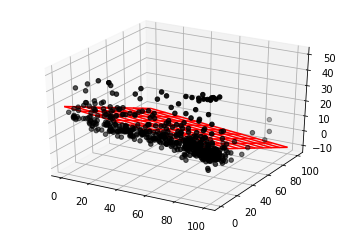

In [ ]:
xmesh, ymesh = np.meshgrid(np.linspace(0, 100, 10),
                            np.linspace(0, 100,  10))
zmesh = (alpha + beta_1 * xmesh.ravel() +
        beta_2 * ymesh.ravel()).reshape(xmesh.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.AGE, X.CRIM, Y_data, color='k')
ax.plot_wireframe(xmesh, ymesh, zmesh, color='r')
plt.show()

このとき、β1とβ2は偏回帰係数と呼ばれます。β1はX2が一定のとき、X1の変化によって生じるYの変化を示し、β2はX1が一定のとき、X2の変化によって生じるYの変化を示します。

### 決定係数

重回帰分析においても、単回帰分析と同様に観測データに対する当てはまりの良さ(適合度)を示す尺度として決定係数を用います。

このときの決定係数R2は、

$$ 
 R^2 = \frac{回帰平方和}{Yの全変動} 
      = \frac{\sum{(\hat{Y}-\bar{Y})}}{\sum{(Y-\bar{Y})}}
      = \frac{\hat{\beta_1} S_{Y1} + \hat{\beta_2} S_{Y2}}{S_{YY}}  
$$

で与えられます。

やはり、重回帰分析の決定係数についても、多くの教科書などで「0.6以上ですと説明力の高いモデルです」などの記載があることがあります。が、ほとんどの場合研究者が学術論文をまとめるときには考慮されない気がします！そのため、こういう指標もあるんだなぁ。というくらいで捉えて頂けると良い気がします。

決定係数を実際にもとめてみましょう。

In [ ]:
#決定係数を求める
R_square = ((beta_1 * SY1) + (beta_2 * SY2)) / SYY
print("決定係数", R_square)

決定係数 0.21655799477425605


**自由度修正済み決定係数**

重回帰分析の決定係数の場合、説明変数の数が増えると、自動的に係数の値が大きくなる問題があります。被説明変数に寄与していない説明変数が含まれていても、追加することで、結果として残差が小さくなるからです。こうした課題に対応するために、自由度修正済み決定係数では、サンプルサイズと説明変数の数を用いて以下のように値への修正を行います。

$$ 
\bar{R}^2 = 1 - \frac{n-1}{n-k-1} (1-R^2)
$$

実際に計算しましょう。

In [ ]:
#修正済み決定係数を求める
#ここでの説明変数は2

adjusted_R_square = 1.0 - (len(Y)-1)/(len(Y)-2-1) * (1 - R_square) 
print("修正済み決定係数", adjusted_R_square)

修正済み決定係数 0.21344291721868647


決定係数とは若干値が異なっていることが確認できると思います。

### 残差とガウスマルコフの定理


最小二乗法における誤差項utの仮定として、以下の要素が挙げられます。
1.から4. の仮定が成立するとき、OLSから得られる推定量は最良線型普遍推定量 (Blue Linear Unbiased Estimator; BLUE) となる。このことを、ガウス=マルコフの定理と呼びます。

1. $$ E(u_t) =0 $$ u_t の期待値は0である。
2. $$ E(u_t^2) = \sigma^2 $$ u_t の分散は、どの地点でも一定である。
3. $$ E(u_t u_s) = 0 (t \neq s) $$ u_t と u_sがお互いに無相関である。すなわち自己相関がない。
4. $$ E(X_t u_t) = 0 $$ 説明変数 X_t は, u_t と無相関である。
5. $$ u_t \sim N (0,\sigma^2) $$ u_tは平均0, 分散σの正規分布に従う。

このあたりの用語は暗記するというよりは、実際に色々なデータで回帰分析を実行してみるときに、そういえば「不均一分散になってないかなぁ....」みたいな感じで思い出して頂けると良いのかなと思います。

ということで、今回の分析結果に基づき残差やヒストグラム、相関関係や期待値を計算してみたいと思います。

残差の平均 -7.302020209392334e-15
                0           AGE
0    1.000000e+00 -5.157779e-18
AGE -5.157779e-18  1.000000e+00
                 0          CRIM
0     1.000000e+00 -3.415991e-17
CRIM -3.415991e-17  1.000000e+00


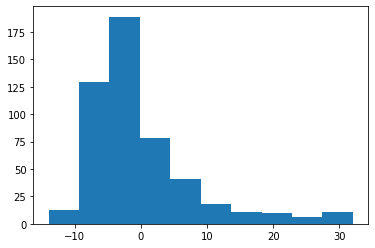

In [ ]:
#残差を計算する
u_t = Y_data - alpha - beta_1 * X.AGE - beta_2 * X.CRIM

#残差のヒストグラムを求める
plt.hist(u_t)

#残差の平均をもとめる
print("残差の平均", np.average(u_t))

#残差と説明変数の相関を見る
temp_ut1 = pd.concat([u_t, X.AGE], axis=1)
temp_ut2 = pd.concat([u_t, X.CRIM], axis=1)

#AGEと残差の相関を確認する
print(temp_ut1.corr())
#CRIMと残差の相関を確認する
print(temp_ut2.corr())

これらを確認する限り、今回の分析結果は誤差項の仮定を満たしているように見受けられます。しかしながら、回帰分析の結果の妥当性を吟味するためには、不均一分散に係る検定も合わせて実施する必要があります。今回は省略しますが、Wald Test, LM Test などで是非調べてみてください。

### 回帰係数の検定(重回帰バージョン)

ここまで回帰式による決定係数と係数が求められたのですが、単回帰分析と同様に、果たして本当にX1やX2がYをうまく説明しているかを判断する必要があります。ここでも、単回帰分析と同じプロセスでを用いて、回帰係数が有意であるか確認する方法についてご説明します。

回帰係数が統計学的にゼロではないと判断されることが、「有意である」ということになります。回帰係数が有意ではないということは、説明変数X1やX2が被説明変数Yに何の影響を与えていないことを示します。

**残差分散を推定する**

ここでは、以下の式で残差分散を計算します。

$$ s^2 = \frac{残差平方和}{サンプルサイズ-説明変数の数-1} = \frac{\sum{\hat{u}^2}}{n-3} $$

In [ ]:
zansa_variance = np.sum(np.power(u_t,2)) / (len(Y) - 2 -1)
print("残差分散", zansa_variance)

残差分散 66.53228655220344


**係数の分散を推定する**

以下の式を用いて、各係数の分散を推定します。

$$ s_\hat{\alpha}^2 = s^2 (\frac{1}{n}+\frac{\bar{X_1^2}S_{22}+\bar{X_2^2}S_{11}-2\bar{X_1}\bar{X_2}S_{12}}{S_{11}S_{22}-S_{12}^2})$$

$$ s_\hat{\beta_1}^2 = s^2 (\frac{S_{22}}{S_{11}S_{22}-S_{12}^2})$$

$$ s_\hat{\beta_2}^2 = s^2 (\frac{S_{11}}{S_{11}S_{22}-S_{12}^2})$$

このとき、S11, S22, S12はそれぞれ、

$$ S_{11} = \sum{(X_1-\bar{X_1})^2}$$
$$ S_{22} = \sum{(X_2-\bar{X_2})^2}$$
$$ S_{12} = \sum{(X_1-\bar{X_2})(X_2-\bar{X_2})}$$

となります。



In [ ]:
#X1の平均の自乗を求める
x1_ave_power=np.power(np.average(X.AGE), 2)
#X2の平均の自乗を求める
x2_ave_power=np.power(np.average(X.CRIM), 2)
#X1の平均をもとめる
x1_ave = np.average(X.AGE)
#X2の平均をもとめる
x2_ave = np.average(X.CRIM)

#alpha の分散を推定する
alpha_variance = zansa_variance * (1 / len(Y) + (x1_ave_power*S22+x2_ave_power*S11 - 2 * x1_ave * x2_ave * S12)/(S11*S22-np.power(S12,2)))

#beta_1の分散を推定する
beta_1_variance = zansa_variance * (S22 / (S11*S22 - np.power(S12,2))) 
#beta_2の分散を推定する
beta_2_variance = zansa_variance * (S11 / (S11*S22 - np.power(S12,2))) 

print("αの分散",alpha_variance)
print("β1の分散",beta_1_variance)
print("β2の分散",beta_2_variance)


αの分散 0.9424107117285732
β1の分散 0.00018989970624032527
β2の分散 0.0020337286947953452


**回帰係数の標準誤差**

以下の式で、標準誤差を計算します。すなわち、分散値の平方根を取ります。

$$ s_\hat{\alpha} = \sqrt{s_\hat{\alpha}^2}　$$
$$ s_\hat{\beta_1} = \sqrt{s_\hat{\beta_1}^2}　$$
$$ s_\hat{\beta_2} = \sqrt{s_\hat{\beta_2}^2}　$$

In [ ]:
alpha_sd = np.sqrt(alpha_variance)
beta_1_sd = np.sqrt(beta_1_variance)
beta_2_sd = np.sqrt(beta_2_variance)

print("αの標準偏差",alpha_sd)
print("β1の標準偏差",beta_1_sd)
print("β2の標準偏差",beta_2_sd)

αの標準偏差 0.9707784050588338
β1の標準偏差 0.013780410234834277
β2の標準偏差 0.04509688120918502


**t値を計算する**

推定値を標準偏差で割ることで、t値を求めます。

$$ t_\hat{\alpha} = \frac{回帰係数\alphaの推定値}{回帰係数\alphaの標準誤差} = \frac{\hat{\alpha}}{s_\hat{\alpha}} $$

$$ t_\hat{\beta_1} = \frac{回帰係数\beta_1の推定値}{回帰係数\beta_1の標準誤差} = \frac{\hat{\beta_1}}{s_\hat{\beta_1}} $$

$$ t_\hat{\beta_2} = \frac{回帰係数\beta_2の推定値}{回帰係数\beta_2の標準誤差} = \frac{\hat{\beta_2}}{s_\hat{\beta_2}} $$

In [ ]:
#t値を計算する
t_alpha=alpha/alpha_sd
t_beta_1=beta_1/beta_1_sd
t_beta_2=beta_2/beta_2_sd

print("αのt値", t_alpha)
print("β1のt値", t_beta_1)
print("β2のt値", t_beta_2)

αのt値 30.697702849283697
β1のt値 -6.4985929121449955
β2のt値 -6.9143532197644735


**t検定を実施する**

t値に基づき、両側検定を用い係数が有意であるかの確認を行います。

以下のように、帰無仮説(null hypothesis)と対立仮説 (alternative hypothesis)を立てます。

$$ 
帰無仮説 \left\{
\begin{array}{ll}
H_0 & : \alpha = 0 \\
H'_0 & : \beta = 0
\end{array}
\right.
$$

$$ 
対立仮説 \left\{
\begin{array}{ll}
H_1 & : \alpha \neq 0 \\
H'_1 & : \beta \neq 0
\end{array}
\right.
$$

先程求めたt値は、自由度 n - 2 (サンプルサイズの数 - 説明変数の数 - 1) のt分布に従う。そのため、t分布表の値に基づいて有意性検定を行います。先程求めたt値が分布表にあるt値(臨界値)よりも大きければ、帰無仮説は棄却され、推定した回帰係数は有意であることになります。

今回の場合、サンプルサイズ=506, 説明変数=2なので, 自由度は503になります。
ここでは、Scipyパッケージのt分布パッケージから臨界値をそれぞれ求めることにします。

In [ ]:
from scipy.stats import t
p_10 = t.ppf(q=0.990, df=503)
p_5 = t.ppf(q=0.995, df=503)
p_1 = t.ppf(q=0.999, df=503)
print("有意水準10％", p_10)
print("有意水準5％", p_5)
print("有意水準1％", p_1)

有意水準10％ 2.3337842002986555
有意水準5％ 2.585638766435804
有意水準1％ 3.106513464116917


先程得られたt値の絶対値を取り、これらの臨界値と比較します。

これにより、いずれの係数も有意水準1％で被説明変数に寄与していることがわかります。

In [ ]:
print("係数αのt値", np.abs(t_alpha))
print("係数β1のt値", np.abs(t_beta_1))
print("係数β2のt値", np.abs(t_beta_2))

係数αのt値 30.697702849283697
係数β1のt値 6.4985929121449955
係数β2のt値 6.9143532197644735


### 多重共線性

実は似たような値ってたくさんあります。

*   ある街の月あたりの降水量とスリップ事故の数
*   「有吉の壁」でパンサー尾形が登場する回数と、有吉さんから「X」をもらう回数
*   「古畑任三郎」で古畑が「お察しします」という回数と、今泉君が余計なことをする回数(これはわかるひとが限られる気がします)

重回帰分析をする上で、説明変数の間に高い相関があると、多重共線性(multicollinearity; マルティコニアリティ, 言いにくいので「マルチコ」) という問題が発生することが多々あります。

多重共線性が生じると、

* 決定係数が高いのにもかかわらず、t値が低くなる
* 推定した係数の符号が、理論と整合的ではなくなる
などの状況が起こりえます。そのため、計量経済学や実証的な分析では、この多重共線性をどう回避するかが課題となります。

主な対処方法としては以下の通りです。


*   不要な説明変数を除去する
*   サンプルサイズを増やす
* パネルデータ分析(これは後期に取り上げる予定)などを試す
* 値を階差や比率にして分析する
* リッジ回帰(これも後期に取り上げる予定)を試す
* 説明変数の主成分分析を行い、互いに無相関な合成変数を作り、それを説明変数として利用する
* VIF をチェックし、10以下であるかを確認する

最後のVIF については、次のStatsmodelを用いた分析で実施してみたいと思います。




### Statsmodel を用いて重回帰分析を行う

さて、単回帰と同じく、StatsModelを用いれば、ここまで数十行に渡った作業を経ることなく、重回帰分析を行うことが出来ます。大学の講義らしいまどこっしさ(again)!

さて、まずは説明変数のリストを作成し、相関係数を確認しましょう。

In [ ]:
import numpy as np
X_list4=pd.concat([X.AGE, X.NOX, X.B] , axis=1)

#相関係数を求める
X_list4.corr()

,AGE,NOX,B
AGE,1.000000,0.731470,-0.273534
NOX,0.731470,1.000000,-0.380051
B,-0.273534,-0.380051,1.000000


In [ ]:
#重回帰分析を行う
import statsmodels.api as sm
model = sm.OLS(Y, sm.add_constant(X_list4))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     48.85
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           1.03e-27
Time:                        06:34:48   Log-Likelihood:                -1775.4
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     502   BIC:                             3576.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4024      2.907     10.113      0.0

回帰係数や決定係数などがまとめて表形式でプロットされたかと思います。そして、それぞれの値がPythonで逐次計算して来た値とほぼ同じになっていることをご確認頂けるかと思います。

**(データサイエンスのWebサイトや講義や教科書だと、こうした結果の出し方しか教えてくれなかったりするのですが、実は裏側でどういうロジックが動いているのかを知るのはとても大事だったりします。ということで、七面倒臭くはあるのですが、ひとつひとつ定式を追って、結果を見ることを是非試してください。）**


続いて、今回利用した変数についてVIFの値をチェックします。10を越える場合、説明変数間で多重共線性が起きている可能性が示唆出来ます。

In [ ]:
#VIFの値をチェックする
from statsmodels.stats.outliers_influence import *
num_cols = model.exog.shape[1] 
print(num_cols) #説明変数の列数
vifs = [variance_inflation_factor(model.exog, i) for i in range(0, num_cols)]
pdv = pd.DataFrame(vifs, index=model.exog_names, columns=["VIF"])
print(pdv)

どうやら、多重共線性は発生していない模様です。

同様に、Xで利用する変数リストを変えたバージョンで実行してみます。ここでは、CRIM, AGE, Bを説明変数として利用しています。

In [ ]:
import numpy as np
X_list=pd.concat([X.CRIM, X.AGE, X.B], axis=1)

#相関係数を求める
X_list.corr()

In [ ]:
#重回帰分析を行う
import statsmodels.api as sm
model = sm.OLS(np.log(Y), sm.add_constant(X_list))
results = model.fit()
print(results.summary())
print('p-values\n', results.pvalues)
a, b, c, d = results.params
print('a',a, 'b',b, c, d)

In [ ]:
#VIFの値をチェックする
from statsmodels.stats.outliers_influence import *
num_cols = model.exog.shape[1] 
print(num_cols) #説明変数の列数
vifs = [variance_inflation_factor(model.exog, i) for i in range(0, num_cols)]
pdv = pd.DataFrame(vifs, index=model.exog_names, columns=["VIF"])
print(pdv)

### 最小自乗推定量を行列とベクトルで推定する

最後に、Day1-2で取り扱った行列表現を使って、複数の説明変数から成る重回帰の推定量を導出してみたいと思います。

説明変数のセットを行列 X で表し、かつ被説明変数Yをベクトル表現すると、

$$ X^T X \hat{\beta} = X^T y$$

と正規方程式として示すことが出来ます。ここでは、最小自乗推定量βを知りたいので、右辺と左辺に $$ X^T X $$ の逆行列である

$$ (X^T X)^{-1} $$

をかけ合わせてやると、以下の式を得ることが出来ます。


$$ \hat{\beta} = (X^T X)^{-1} X^T y$$

さて、線形代数学やNumpyなどで行列は取り上げてきたのですが、この数式を見てもいまいちピンとこないので、ここからはひとつひとつデータの中身を確認しつつ計算していきましょう。

まず、Xの中身を確認します。
ここでは、先程のStatsmodels で解法した際にも利用した、X_listを用います。このX_listは、CRIMとAGEとBから構成されています。

In [ ]:
#行列の中身を確認する
X_list

In [ ]:
#行列処理を行うため、X_listをNumpyに変換する
X_list_np=X_list.values
X_list_np

#X_list の左端に1の数列を加えています
#定数項を計算するためです
X_list_np=np.c_[np.ones(X_list_np.shape[0]), X_list_np]

#中身を確認する
X_list_np

続いて、この行列の転置を求めます

In [ ]:
#転置した結果を別のデータとして保存する
X_list_np_T=X_list_np.T

X_list_np_T

続いて、その行列をかけ合わせます。

In [ ]:
X_list_temp = np.dot(X_list_np_T, X_list_np)

これで、

$$ (X^T X) $$

が計算できました。続いて、右辺である

$$ X^T y$$

計算を行います。



In [ ]:
#Series型に変換する
Y_data=Y["price"]

#次元数をチェックする
print(X_list_temp.shape)
print(X_list_np_T.shape)
print(Y_data.shape)

#Xの転置行列とXで行列の掛け算を行う
temp5=np.dot(X_list_np_T, Y_data)
print(temp5)

これで右辺と左辺が揃ったので、係数を方程式を解くためのlinalg ライブラリを用いて解法します。

In [ ]:
#lianlgライブラリをインポートする

from scipy import linalg
coef = linalg.solve(X_list_temp, temp5)
print(coef)

かくして、係数が導き出されました。


もしくは、先程示した以下の式からも導出することが出来ます。

$$ \hat{\beta} = (X^T X)^{-1} X^T y$$

逆行列を導出し、それをXの転置行列とyをかけ合わせたベクトルと掛け合わせます。

In [ ]:
X_list_temp_inv=np.linalg.inv(X_list_temp)
temp6=np.dot(X_list_temp_inv, temp5)

print(temp6)

ということで、係数が計算できました。

参考文献
- https://qiita.com/NNNiNiNNN/items/4fd5367f9ead6e5905a9


## レポート+α（配点50点)

サンプルデータセットの変数Xのうち、CRIM, ZN, INDUS, NOX, RM, DIS, RAD, TAX, PTRATIO, B, LSTAT から複数の説明変数を選択し、被説明変数を Y (Price) として重回帰分析を行うこと。
このとき、
 - 回帰係数の推定
 - 決定係数の導出
 - 回帰係数の検定
 - 相関係数とVIF値を用いた多重共線性のチェック
 などを行い、説明変数が有意に寄与したか確認すること。

提出は、Google Colaboratory の共有リンクもしくは Jupyter Notebook の内容をTeams のDM経由で行うこと。2021/8/29 17:30 までを期限とする。